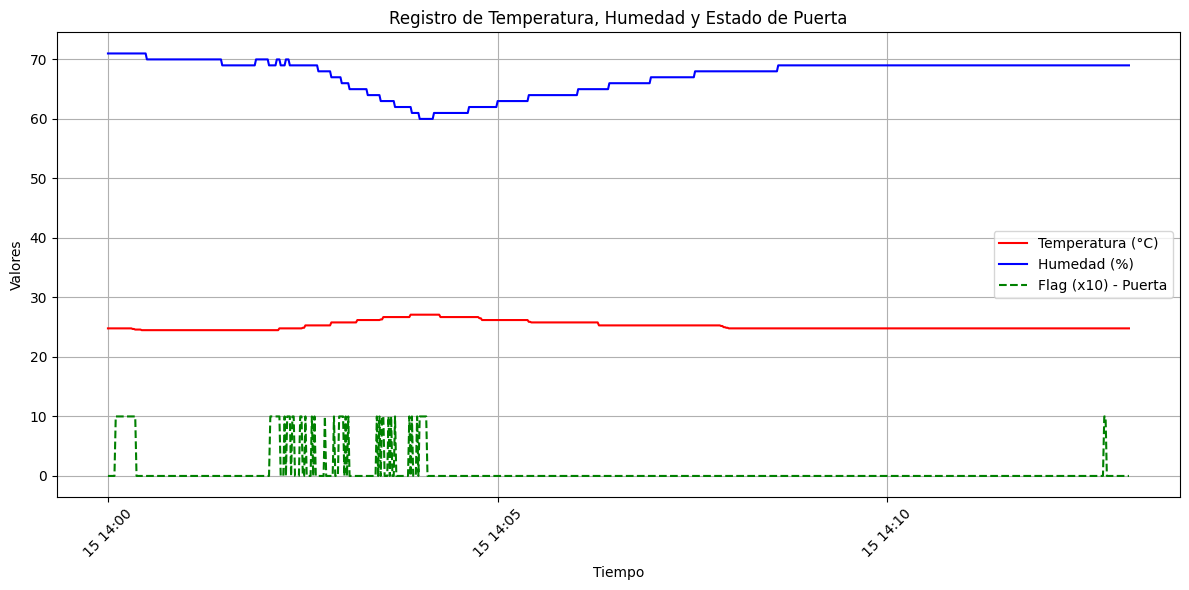

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo de texto y agregar tiempo
def procesar_archivo_log(ruta_archivo, hora_inicio):
    # Cargar los datos separados por comas
    df = pd.read_csv(ruta_archivo, header=None, names=["Temperatura", "Humedad", "Flag"])
    
    # Crear una columna de tiempo con hora de inicio especificada
    tiempo_inicial = pd.Timestamp(hora_inicio)  # Hora inicial
    df['Tiempo'] = tiempo_inicial + pd.to_timedelta(range(len(df)), unit='s')  # Incrementa en segundos
    
    return df

# Graficar las variables
def graficar_variables(df):
    plt.figure(figsize=(12, 6))
    
    # Graficar Temperatura
    plt.plot(df['Tiempo'], df['Temperatura'], label='Temperatura (°C)', color='red')
    
    # Graficar Humedad
    plt.plot(df['Tiempo'], df['Humedad'], label='Humedad (%)', color='blue')
    
    # Graficar Flag
    plt.plot(df['Tiempo'], df['Flag'] * 10, label='Flag (x10) - Puerta', color='green', linestyle='--')
    
    # Configuración de la gráfica
    plt.title('Registro de Temperatura, Humedad y Estado de Puerta')
    plt.xlabel('Tiempo')
    plt.ylabel('Valores')
    plt.xticks(rotation=45)  # Rota las etiquetas del eje X
    plt.legend()
    plt.grid()
    plt.tight_layout()
    
    # Mostrar gráfica
    plt.show()

# Ruta del archivo
ruta_archivo = "20241215_arduino3.txt"

# Hora inicial: 2:00 PM del día actual
hora_inicio = "2024-06-15 14:00:00"  # Año-Mes-Día Hora:Minuto:Segundo

# Procesar el archivo y graficar
df_log = procesar_archivo_log(ruta_archivo, hora_inicio)
graficar_variables(df_log)